In [24]:
import utility.spectral as spectral
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt

In [25]:
Beta=20
Nt=1024
TauGrid=np.linspace(1.0e-6, Beta-1.0e-6, Nt)

In [28]:
MaxFreq=200.0
Nw=2048
FreqGrid=np.linspace(-MaxFreq, MaxFreq, Nw)

In [29]:
TauKer=spectral.TauKernel(Beta, TauGrid, FreqGrid, "Fermi")
ut, st, vt=linalg.svd(TauKer)

In [31]:
st[0:64]

array([1.06464585e+00, 1.06079917e+00, 7.05647317e-01, 6.21554261e-01,
       4.35239071e-01, 3.48500771e-01, 2.41567175e-01, 1.86070849e-01,
       1.27318919e-01, 9.65189472e-02, 6.49710233e-02, 4.88355434e-02,
       3.23513574e-02, 2.41659153e-02, 1.57797158e-02, 1.17223888e-02,
       7.55728532e-03, 5.58470307e-03, 3.55966631e-03, 2.61709549e-03,
       1.65110911e-03, 1.20784532e-03, 7.54924030e-04, 5.49559636e-04,
       3.40529045e-04, 2.46714994e-04, 1.51647384e-04, 1.09360856e-04,
       6.67127404e-05, 4.78936255e-05, 2.90071314e-05, 2.07334401e-05,
       1.24716626e-05, 8.87651919e-06, 5.30452163e-06, 3.75983020e-06,
       2.23269926e-06, 1.57617788e-06, 9.30294083e-07, 6.54176341e-07,
       3.83836818e-07, 2.68883757e-07, 1.56865699e-07, 1.09478877e-07,
       6.35144975e-08, 4.41670122e-08, 2.54847836e-08, 1.76589479e-08,
       1.01354764e-08, 6.99874762e-09, 3.99620334e-09, 2.75009334e-09,
       1.56232049e-09, 1.07157622e-09, 6.05738697e-10, 4.14113024e-10,
      

In [32]:
Nwn=256
WnGrid=(np.array(range(-Nwn, Nwn))+0.5)*2.0*np.pi/Beta

In [33]:
WnKer=spectral.MatFreqKernel(Beta, WnGrid, FreqGrid, "Fermi")
uw, sw, vw=linalg.svd(WnKer)

In [34]:
st[0:64]/sw[:64]

array([ 2.24348031,  2.26063107,  2.27477085,  2.05244728,  2.48782472,
        2.04149482,  2.62625604,  2.06542189,  2.74293269,  2.11634688,
        2.85926275,  2.18315196,  2.98247899,  2.26090234,  3.11528593,
        2.34779229,  3.25902118,  2.44332432,  3.41465373,  2.54756579,
        3.58310374,  2.66086345,  3.7653481 ,  2.78373209,  3.96246003,
        2.91681008,  4.17562926,  3.06084208,  4.40617675,  3.21667409,
        4.65556869,  3.38525497,  4.92543102,  3.56764176,  5.21756544,
        3.76500762,  5.53396723,  3.97865204,  5.87684537,  4.21001299,
        6.24864524,  4.46068096,  6.65207419,  4.73241514,  7.0901306 ,
        5.02716169,  7.56613652,  5.34707445,  8.08377466,  5.69453828,
        8.64713007,  6.0721954 ,  9.26073721,  6.48297507,  9.92963282,
        6.93012725, 10.65941726,  7.41725964, 11.45631577,  7.94838437,
       12.32727849,  8.52795321, 13.27999874,  9.16092654])

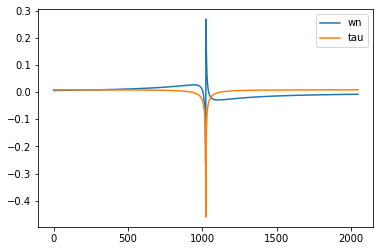

In [40]:
fig=plt.figure()
plt.plot(uw[:, 3].real, label="wn")
plt.plot(ut[:, 2].real, label="tau")
plt.legend()
plt.show()

In [10]:
tt=np.dot(TauKer, TauKer.T)
tt.shape

(512, 512)

In [11]:
e=linalg.eigvals(tt)
print(e[0:48])
np.sqrt(e[0:48].real)/st[0:48]

[ 1.53985497e+00+0.j  1.51835772e+00+0.j  7.33318063e-01+0.j
  6.57604145e-01+0.j  2.35049931e-01+0.j  1.96941850e-01+0.j
  6.35351566e-02+0.j  5.12555341e-02+0.j  1.56199684e-02+0.j
  1.23014549e-02+0.j  3.58013017e-03+0.j  2.77204732e-03+0.j
  7.74594084e-04+0.j  5.92105448e-04+0.j  1.59440317e-04+0.j
  1.20634117e-04+0.j  3.13903785e-05+0.j  2.35473983e-05+0.j
  5.93418602e-06+0.j  4.41838905e-06+0.j  1.08039181e-06+0.j
  7.99041222e-07+0.j  1.89878980e-07+0.j  1.39566903e-07+0.j
  3.22759778e-08+0.j  2.35870953e-08+0.j  5.31475418e-09+0.j
  3.86278518e-09+0.j  8.48944734e-10+0.j  6.13798874e-10+0.j
  1.31698076e-10+0.j  9.47424391e-11+0.j  1.98623662e-11+0.j
  1.42197221e-11+0.j  2.91494298e-12+0.j  2.07707283e-12+0.j
  4.16601070e-13+0.j  2.95504506e-13+0.j  5.80302092e-14+0.j
  4.09753614e-14+0.j  7.88007027e-15+0.j  5.54156629e-15+0.j
  1.04941367e-15+0.j  7.35168094e-16+0.j  1.39729331e-16+0.j
  1.05395627e-16+0.j -6.85532055e-17+0.j  6.64054850e-17+0.j]


/home/kun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.00000001, 1.00000001,
       1.00000004, 1.00000004, 1.0000001 , 1.00000033, 1.00000002,
       1.00000027, 0.99998857, 0.99999046, 1.00000563, 0.99995139,
       0.99983439, 0.99990928, 1.00216844, 1.0024423 , 1.01651345,
       1.05724775,        nan, 2.36503226])

In [12]:
v=linalg.eig(tt)[1]

In [13]:
ww=np.dot(TauKer.T, TauKer)
ww.shape

(1024, 1024)

In [14]:
u=linalg.eig(ww)[1]

In [15]:
s=np.dot(np.dot(v, TauKer), u.T)

In [16]:
np.diag(s.real)

array([ 1.51157999e-04,  2.82569148e-05,  1.04936431e-04,  4.05842349e-04,
        2.97926339e-04,  8.64218691e-05,  7.18718865e-05, -7.93023346e-05,
        1.52879944e-04,  4.48768126e-05, -1.65333468e-04,  1.24558549e-04,
       -6.37505239e-06, -5.17286488e-04, -7.91340122e-05,  9.74794288e-04,
       -3.16444074e-04,  9.54194776e-04,  3.17538250e-05,  1.55316989e-04,
       -4.40937531e-05,  7.32581157e-05, -1.46157197e-04,  2.92124842e-04,
       -7.52037284e-05, -3.72899687e-05, -8.17542883e-05, -3.74345651e-05,
       -2.13706919e-04,  8.93124717e-05,  3.11182328e-05,  9.64243155e-05,
        2.06318734e-04, -2.18827697e-04,  3.55426149e-04,  3.55402196e-04,
       -3.69888089e-04,  2.94569651e-04, -2.20183380e-04,  1.90089197e-04,
       -9.63160418e-05,  1.06042547e-03,  3.55807302e-04,  3.06546514e-04,
       -7.35013296e-04,  4.48257670e-04, -9.90564662e-04, -2.06256509e-04,
       -2.30977636e-04,  2.84313652e-04, -2.66524960e-04, -1.40260043e-03,
        1.22349381e-04,  

In [17]:
u,s,v=linalg.svd(tt)

In [18]:
np.sqrt(s[0:48])/st[0:48]
st[0:48]

array([1.24090893e+00, 1.23221659e+00, 8.56339923e-01, 8.10927953e-01,
       4.84819482e-01, 4.43781309e-01, 2.52061811e-01, 2.26396851e-01,
       1.24979872e-01, 1.10911924e-01, 5.98341890e-02, 5.26502357e-02,
       2.78315304e-02, 2.43332170e-02, 1.26269679e-02, 1.09833564e-02,
       5.60271171e-03, 4.85256616e-03, 2.43601848e-03, 2.10199644e-03,
       1.03941898e-03, 8.93891057e-04, 4.35751052e-04, 3.73586541e-04,
       1.79655164e-04, 1.53580908e-04, 7.29023605e-05, 6.21513087e-05,
       2.91366560e-05, 2.47749645e-05, 1.14759778e-05, 9.73357235e-06,
       4.45672100e-06, 3.77090345e-06, 1.70732038e-06, 1.44120494e-06,
       6.45453786e-07, 5.43608450e-07, 2.40893246e-07, 2.02433558e-07,
       8.87844637e-08, 7.44484513e-08, 3.23245612e-08, 2.70479243e-08,
       1.16286865e-08, 9.71034200e-09, 4.13466339e-09, 3.44560039e-09])

In [61]:
import scipy.integrate as integrate

def kernal(x, t1, t2):
    return np.exp(-(t1+t2)*x)/(1.0+np.exp(-Beta*x))**2

Ntt=512
TauGrid=np.linspace(1.0e-8, Beta-1.0e-8, Ntt)
TT=np.zeros((Ntt, Ntt))
for i in range(Ntt):
    for j in range(Ntt):
        t1=TauGrid[i]
        t2=TauGrid[j]
        TT[i, j]=1.0/(t1+t2)
        

In [62]:
u, s, v=linalg.svd(TT)

In [63]:
np.sqrt(s[:32].real)

array([7.07106781e+03, 7.42397546e+00, 4.69101086e+00, 2.65475428e+00,
       1.44313686e+00, 7.66775101e-01, 4.00117028e-01, 2.05507542e-01,
       1.04048085e-01, 5.19877559e-02, 2.56584374e-02, 1.25186135e-02,
       6.04175951e-03, 2.88600215e-03, 1.36511488e-03, 6.39688831e-04,
       2.97072115e-04, 1.36973964e-04, 7.06824137e-05, 7.06824137e-05,
       7.06824137e-05, 7.06824137e-05, 7.06824137e-05, 7.06824137e-05,
       7.06824137e-05, 7.06824137e-05, 7.06824137e-05, 7.06824137e-05,
       7.06824137e-05, 7.06824137e-05, 7.06824137e-05, 7.06824137e-05])

In [45]:
Nwn=128
WnGrid=(np.array(range(-Nwn, Nwn))+0.5)*2.0*np.pi/Beta
WW=np.zeros((2*Nwn, 2*Nwn))
for i, wn1 in enumerate(WnGrid):
    for j, wn2 in enumerate(WnGrid):
        if abs(wn1+wn2)<1.0e-10:
            WW[i, j]=0.0
        else:
            WW[i, j]=2.0*np.pi/(wn1+wn2)

In [46]:
e, u=linalg.eig(WW)

In [47]:
e[:64]


array([-62.06564892, -61.55254167, -61.05562285, -60.56450505,
       -60.07611382, -59.58918085, -59.10308514, -58.61748859,
       -58.1321933 , -57.64707736, -57.16206276, -56.67709823,
       -56.19214936, -55.70719279,  62.06564892,  61.55254167,
        61.05562285,  60.56450505,  60.07611382,  59.58918085,
        59.10308514,  58.61748859,  58.1321933 ,  57.64707736,
        57.16206276,  56.67709823,  56.19214936,  55.70719279,
        55.22221254,  54.73719772,  54.25214092, -55.22221254,
       -54.73719772, -54.25214092, -53.76703725,  53.76703725,
        53.28188359, -53.28188359, -52.79667808,  52.79667808,
        52.3114198 , -52.3114198 , -51.8261085 ,  51.8261085 ,
        51.34074441, -51.34074441, -50.85532811, -50.36986045,
        50.85532811,  50.36986045, -49.88434242, -49.39877517,
        49.88434242,  49.39877517, -48.91315991, -48.42749791,
        48.91315991,  48.42749791, -47.94179045, -47.45603883,
        47.94179045,  47.45603883,  46.97024435,  46.48